In [1]:
import numpy as np
import pandas as pd
import random
import numpy.linalg as LA
from scipy.stats import multinomial
from scipy.stats import multivariate_normal
from scipy.stats import bernoulli
from scipy.stats import mode
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import time
import matplotlib.pyplot as plt
from gibbs_sampler import *
from helper_functions import *

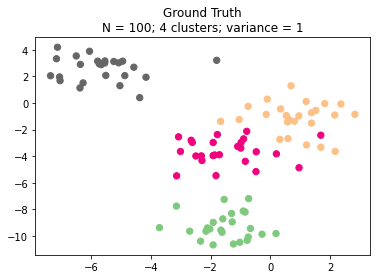

In [3]:
n_samples=100; centers=4; var=1;iter=100;cluster_std=1;

X, y_true = make_blobs(n_samples=n_samples, centers=centers,
                            cluster_std=cluster_std, random_state=2, return_centers=False)

plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='Accent');
plt.title("Ground Truth\nN = " + str(n_samples) + "; " + str(centers) + " clusters; variance = " + str(var))
plt.savefig("figures/ground_truth.png")

In [4]:
y_pred, labels_array, centers, _ = gibbs_sampler(X, var, seed=1, init_cluster_num=10, B=100)

In [5]:
rand_score = adjusted_rand_score(y_true,y_pred.flatten())
rand_score

0.9472

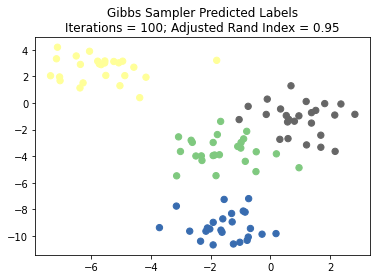

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='Accent');
plt.title("Gibbs Sampler Predicted Labels\nIterations = " + str(iter) + "; Adjusted Rand Index = " + str(round(rand_score,2)))
plt.savefig("figures/predicted_labels.png")

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.set_figheight(6)
#fig.set_figwidth(20)
#fig.suptitle('Ground Truth vs. Gibbs Sampler Predictions')
ax1.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='Accent');
ax1.set_title("Ground Truth\nN = " + str(n_samples) + "; " + str(centers) + " clusters; " + str(var) + " variance")
ax2.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='Accent');
ax2.set_title("Gibbs Sampler Predicted Labels\nIterations = " + str(iter) + "; Adjusted Rand Index = " + str(round(rand_score,2)))
#plt.savefig("figures/gibbs_predictions.png")

Text(0.5, 1.0, 'Gibbs Sampler Predicted Labels\nIterations = 100; Adjusted Rand Index = 0.95')

ValueError: Image size of 122886x279 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

In [12]:
labels_gif(X, labels_array, "Gibbs Sampler", "figures", "gibbs_sampler")